# Example to reduce file size in case of memory errors (using pyaerocom)

In [1]:
import pyaerocom as pya
pya.change_verbosity('critical')
pya.__version__

'0.8.1.dev4'

**NOTE: YOU NEED PYAEROCOM v0.8.1.dev4 or larger for this**

In [2]:
DATA_DIR = '/home/notebook/shared-ns1000k/inputs/pyaerocom-testdata/modeldata/MIROC-SPRINTARS_AP3-CTRL/renamed/'
LARGE_FILE = 'aerocom3_MIROC-SPRINTARS_AP3-CTRL_ec550aer_ModelLevel_2010_6hourly.nc'

**This file has 64 GB filesize**

In [6]:
data = pya.GriddedData(DATA_DIR +  LARGE_FILE, var_name='ec550aer')
data

/opt/conda/lib/python3.7/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ec550aer'
  warnings.warn(message % (variable_name, nc_var_name))


pyaerocom.GriddedData
Grid data: <iris 'Cube' of volume_extinction_coefficient_in_air_due_to_ambient_aerosol_particles / (1/Mm) (time: 1460; atmosphere_sigma_coordinate: 56; latitude: 320; longitude: 640)>

### Extract surface level and crop summer months and arctic region

In [7]:
data_surf = data.extract_surface_level()

In [8]:
data_surf_cropped = data_surf.crop(time_range=(4, 8), lat_range=(66, 90))
data_surf_cropped

pyaerocom.GriddedData
Grid data: <iris 'Cube' of volume_extinction_coefficient_in_air_due_to_ambient_aerosol_particles / (1/Mm) (time: 4; latitude: 43; longitude: 640)>

### Save to NetCDF

In [9]:
data_surf_cropped.to_netcdf('.', 'SPRINTARS_extract.nc')

'./SPRINTARS_extract.nc'

### Reload the subset that was just saved

In [10]:
reloaded_subset = pya.GriddedData('SPRINTARS_extract.nc')
reloaded_subset

pyaerocom.GriddedData
Grid data: <iris 'Cube' of volume_extinction_coefficient_in_air_due_to_ambient_aerosol_particles / (1/Mm) (time: 4; latitude: 43; longitude: 640)>

Failed to retrieve ts_type in GriddedData pyaerocom.GriddedData
Grid data: <iris 'Cube' of volume_extinction_coefficient_in_air_due_to_ambient_aerosol_particles / (1/Mm) (time: 4; latitude: 43; longitude: 640)>
/opt/conda/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/conda/lib/python3.7/site-packages/iris/coords.py:1353: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'surface_air_pressure'.
  warnings.warn(msg.format(self.name()))


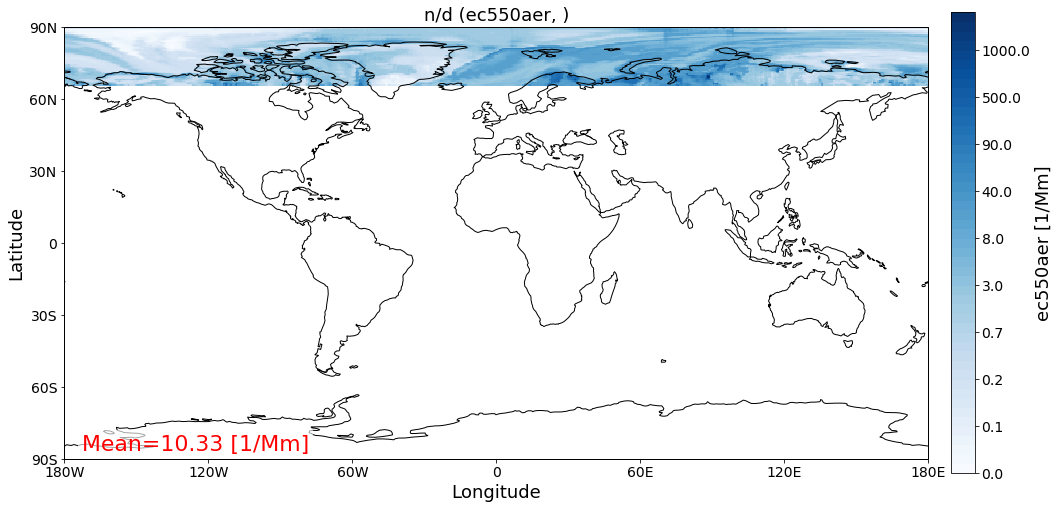

In [12]:
reloaded_subset.quickplot_map();